# Lab Statment
This lab introduces Support Vector Machine classification methods by using data from the pre-existing UCI Iris Flower Dataset. In addtion, it also explains the "iloc" commands, as well as some exploritory python code that is useful to know.

# Objectives
- Create a professional looking Jupyter Notebook
- Download Iris Flower Dataset from the UCI Machine Learning Repository
- Use Pandas and Pandas Dataframes to Import and Save Data
- Data-Preprocessing: Convert the multi-class Iris flower dataset into a subset useful for binary classification
- Use Numpy to convert and encodethe categorical class labels into integer class labels 
- Perform Decision Boundary Plotting with MatPlotLib
- Use Support Vector Classifier on Iris Flower Subset
- Create Classification Report for Recal1, Precision and F1-Score
- Perform Model Evaluation with Classification Report Confusion Matrix
- Use Scikit-Learn built-in Label Encoder

# Loading the Iris Flower Dataset

In [9]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Loading (and Saving) the Iris Flower Dataset
There are times when you need to save all of part of a dataset to your storage device. The code snippet below indicates how to save a pandas dataframe (that was populated with  the iris flower dataset from the UCI Machine Learning Repository)to a CSV file.

### Load the Iris Flower Dataset from the UCI Machine Learning Repository into a Pandas Dataframe

In [11]:
#Import Pandas Dataframe
import pandas

#Get the Online Version
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

#Extract the Names into a List
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#Instantiate the Variable
iris_df = pandas.read_csv(url, names = names)

#Print the Shape and Last 5 Rows
print(iris_df.shape)
iris_df.tail()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Save Iris Dataset to a CSV File

In [13]:
iris_df.to_csv('data/iris_flower_dataset.csv', index = False)

### Reload Saved Data
In order to see if everything went well, it's best to reload the data and compare it to the original download.

In [16]:
#Check the Data
iris_df_from_file = pd.read_csv('data/iris_flower_dataset.csv')

#Check the Shape
iris_df_from_file.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Data Preprocessing

### "iloc" Command
Keep the following in mind when selecting Pandas Data using the **"iloc"** command:
- The "iloc" indexer for the Pandas Dataframe is used for **integer location** based indexing selection by position
- The "iloc" indexer syntax is: **data_frame_name.iloc[row_selection, column_selection]**

To Select Rows:
- First Row of Dataframe: **data_frame_name.iloc[0]**
- Second Row of Dataframe: **data_frame_name.iloc[1]**
- Last Row of Dataframe: **data_frame_name.iloc[-1]**

To Select Columns:
- First Column of Dataframe: **data_frame_name.iloc[:,0]**
- Second Column of Dataframe: **data_frame_name.iloc[:,1]**
- Last Column of Dataframe: **data_frame_name.iloc[:,-1]**

### Extracting the First 100 Class Labels
Extract the first 100 class labels that correspond to 50 Iris-Setosa and 50 Iris-Versicolor, respectively

In [17]:
#Import Essentials
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Select Setosa and Versicolor
y = df.iloc[0:100, 4].values

# Class Label Encoding

Now, let’s encode the class labels as integers to use with our Perceptron model we will develop in the lab. This means we will convert them as follows: 1=Versicolor and -1=Setosa.We will use Numpy to do this as follows:

In [18]:
#Encode Classes
y = np.where(y== 'Iris-setosa', -1,1)

The code above is essentially saying, encode Iris-stosa as -1 whenever y equals "Iris-setosa". For anything other than and Iris-Setosa, encode that as 1.

# Extracting the Essential Data

To keep the analysis simple, we will only use two features from the reduced dataset. Let’s extract the first feature column (sepal length) and the third feature column (petal length) to use in our analysis.

In [19]:
#Extract Sepal Length and Petal Length
X = df.iloc[0:100, [0, 2]].values

We now have extracted the subset of data from the Iris flower dataset and can proceed with plotting it. We examine the data to see if it is **linearly separable** with a well-defined decision boundary.

# Decision Boundary Plotting

We can better visualize the data by a simple plot. Note the use of python lists in the code below...

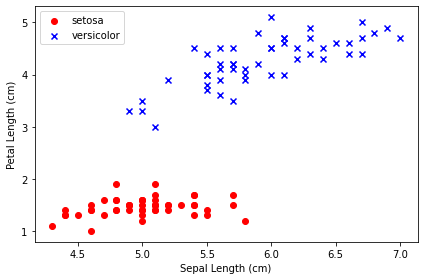

In [20]:
#Plot Data
plt.scatter(X[:50, 0], X[:50, 1],
          color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel('Sepal Length (cm)')
plt.ylabel("Petal Length (cm)")
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

# Train/Test Split of the Data

In [25]:
#Import Train-Test Split from Sci-Kit Learn
from sklearn.model_selection import train_test_split

#Complete the Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Check the Shapes
print(X_train.shape)
print(X_test.shape)

(75, 2)
(25, 2)


# Support Vector Classifier

Up to this point, we have used the K-NN and Logistic Regression algorithms for our classifiers. Another, popular (and powerful) algorithm is the Support Vector Machines 

### Fitting the Model Using a Linear Support Vector Machine Classifier

In [26]:
#Import the Essentials
from sklearn.svm import LinearSVC

#Instantiate the Model
lsvc = LinearSVC()

#Fit the Model
lsvc.fit(X_train, y_train)

LinearSVC()

### Evaluating the Support Vector Machine Model

In [31]:
#Establish the Prediction Variable
y_pred = lsvc.predict(X_test)

#Print the Predictions
print("The Test Set Predictions are: \n{}".format(y_pred))

#Print the Accuracy Score Using NumPy
print("The Test Set Score from using NumPy: {0:0.2f}".format(np.mean(y_pred == y_test)))

#Print the Accruracy Using Score Method
print("The Test Set Score using SciKit-Learn's Scoring Method: {0:0.2f}".format(lsvc.score(X_test, y_test)))

The Test Set Predictions are: 
[-1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1]
The Test Set Score from using NumPy: 1.00
The Test Set Score using SciKit-Learn's Scoring Method: 1.00


Normally, the accuracy of the model wouldn't be 100%...it's only this way because we have a small amount of data that is very clean and well organized.

# Model Performance Evaluation via Classification Report and Confusion Matrix

Determine how well the model you built works by applying model evaluation metrics (i.e. print the classification report and the confusion matrix.)

### Classification Report

In [32]:
#Import the Essentials
from sklearn import metrics

#Print the Results
print('Classification Report:')
print(metrics.classification_report(y_test, y_pred, target_names = ['setosa', 'versicolor']))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



### Confusion Matrix

In [33]:
#Print the Results
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[13  0]
 [ 0 12]]


Again, normally the Classification Report and Confusion Matrix don't come out looking this clean. This is because we are using an extremely small data set that is clean.

# Extras

### Loading A Dataset from a Text (.txt) File

In [36]:
#Import the Essentials
import pandas as pd

#Bring in the Dataset
df = pd.read_csv('data/dataset_iris.txt',
                encoding = 'utf-8',
                comment = '#',
                sep = ',')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Explain What's Going On Here...

In [37]:
X = df.iloc[:, :4].values
y = df['class'].values
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The first line of code is specifically looking at the integer locations of all the rows, and all 4 columns, and puts them in a NumPy array. The second line of code takes all of the 'class' labels and puts them in a NumPy array. The final line of code prints only the names of the classes once because those are the unique names while also explaining what their data type is.

### The Label Encoder

Scikit-Learn has a built-in label encoder that can encode the labels in a target vector, like what was hardcoded above using NumPy. The code below encodes the **complete** target vector labels from the **entire iris flower dataset**.

In [40]:
#Import the Essentials
from sklearn.preprocessing import LabelEncoder

#Instantiate the Label Encoder
l_encoder = LabelEncoder()

#Encode the Labels
l_encoder.fit(y)

#Display the Results
l_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The last code of this line is displaying to the user what things will be encoded. In this case, the classes will be encoded.

### Explain What's Going On Here...

In [41]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2])

The results from the fitting of encoding y were passed to the transform command, which changes the names of the flowers from strings to numbers. Then, the **np.unique(y_enc)** command only displays one copy of each number (instead of everything that was encoded).

### Comment on the Following Code's Output

In [42]:
print(y_enc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Instead of printing all of the class names of the flowers in the dataset, this code is only printing out the encoded values of those classes in a 1D NumPy array.

### Explain What's Going On Here...

In [43]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The code above takes the encoding that was done and reverses it - essentially turning encoded class values back to their regular class names. Again, the np.unique command only displays one copy of each flower name.